## K-NEAREST NEIGHBOURS -

### Tasks :


- Analyse the data using the visualizations
- Preprocess the data by handling missing values & Outliers, if any.
- Split the dataset into training and testing sets (80% training, 20% testing).
- Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
- Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
- Visualize the decision boundaries of the classifier.

## EDA -

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

In [2]:
# Load the dataset
data = pd.read_csv('Zoo.csv')

In [19]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
10,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [27]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [20]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [21]:
data.corr()

C:\Users\prana\AppData\Local\Temp\ipykernel_18240\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feathers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airborne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aquatic,NaN,NaN,NaN,NaN,NaN,1.000000,0.175412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108465,NaN
predator,NaN,NaN,NaN,NaN,NaN,0.175412,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118913,NaN
toothed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
backbone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breathes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [26]:
# Get basic statistics for numerical columns
print(df.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

- Handle missing values

In [6]:
# Handle missing values
data.fillna(data.mean(), inplace=True)


C:\Users\prana\AppData\Local\Temp\ipykernel_18240\2648470941.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


- Detect outliers

In [9]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = outliers.append(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    return outliers



In [10]:
# Detect outliers in the dataset
outliers = detect_outliers_iqr(data)
print("Outliers detected:\n", outliers)



Outliers detected:
    animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
11     chicken     0         1     1     0         1        0         0   
16        crow     0         1     1     0         1        0         1   
20        dove     0         1     1     0         1        0         0   
21        duck     0         1     1     0         1        1         0   
23    flamingo     0         1     1     0         1        0         0   
..         ...   ...       ...   ...   ...       ...      ...       ...   
39    honeybee     1         0     1     0         1        0         0   
57    parakeet     0         1     1     0         1        0         0   
65        pony     1         0     0     1         0        0         0   
68    pussycat     1         0     0     1         0        0         1   
70    reindeer     1         0     0     1         0        0         0   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
11    

C:\Users\prana\AppData\Local\Temp\ipykernel_18240\2181822989.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
C:\Users\prana\AppData\Local\Temp\ipykernel_18240\2181822989.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
C:\Users\prana\AppData\Local\Temp\ipykernel_18240\2181822989.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
C:\Users\prana\AppData\Local\Temp\ipykernel_18240\2181822989.py:10: FutureWarning: The frame.append method is deprecated and will be removed from

In [11]:
# Remove outliers from the dataset
for col in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


In [12]:

# Verify that outliers have been removed
outliers_after_removal = detect_outliers_iqr(data)
print("Outliers after removal:\n", outliers_after_removal)


Outliers after removal:
    animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
48        mink     1         0     0     1         0        1         1   
36        hare     1         0     0     1         0        0         0   
49        mole     1         0     0     1         0        0         1   
54     opossum     1         0     0     1         0        0         1   
94        vole     1         0     0     1         0        0         0   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
48        1         1         1         0     0     4     1         0   
36        1         1         1         0     0     4     1         0   
49        1         1         1         0     0     4     1         0   
54        1         1         1         0     0     4     1         0   
94        1         1         1         0     0     4     1         0   

    catsize  type  
48        1     1  
36        0     1  
49        0     1  
54   

C:\Users\prana\AppData\Local\Temp\ipykernel_18240\2181822989.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
C:\Users\prana\AppData\Local\Temp\ipykernel_18240\2181822989.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
C:\Users\prana\AppData\Local\Temp\ipykernel_18240\2181822989.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
C:\Users\prana\AppData\Local\Temp\ipykernel_18240\2181822989.py:10: FutureWarning: The frame.append method is deprecated and will be removed from

- Splitting :

In [7]:

# Split the dataset into training and testing sets
X = data.iloc[:, 1:-1].values  # Features
y = data.iloc[:, -1].values    # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- Implementin the KNN :

In [8]:
# Implement the K-Nearest Neighbours algorithm
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

- Evaluating classifier's performance :

In [13]:
# Evaluate the classifier's performance
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

Accuracy: 0.9047619047619048, Precision: 0.9047619047619048, Recall: 0.9047619047619048, F1-Score: 0.8957902001380263


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- Visualisation :

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df = pd.read_csv('Zoo.csv')


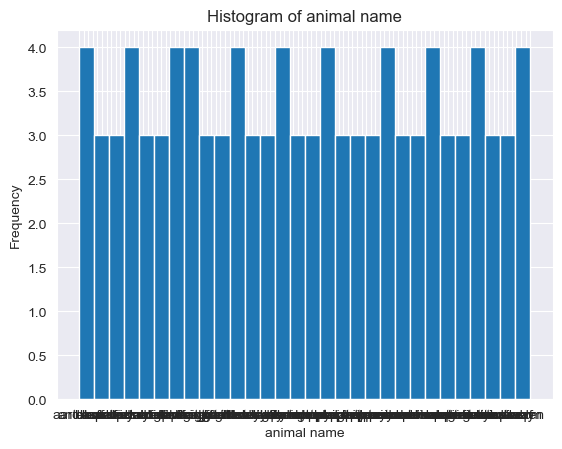

In [29]:
# Histogram

df['animal name'].hist(bins=30)
plt.xlabel('animal name')
plt.ylabel('Frequency')
plt.title('Histogram of animal name')
plt.show()


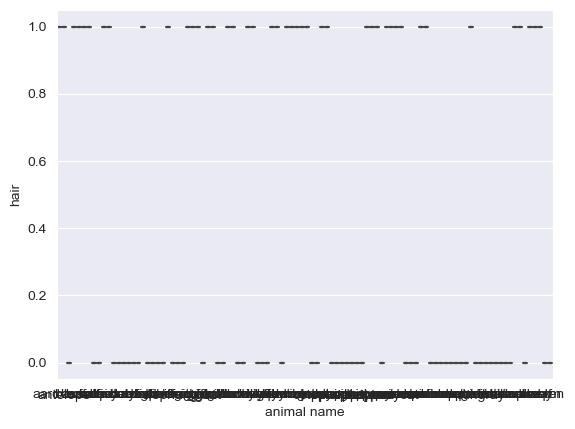

In [38]:
#Boxplot

sns.boxplot(x='animal name', y='hair', data=df)
plt.show()


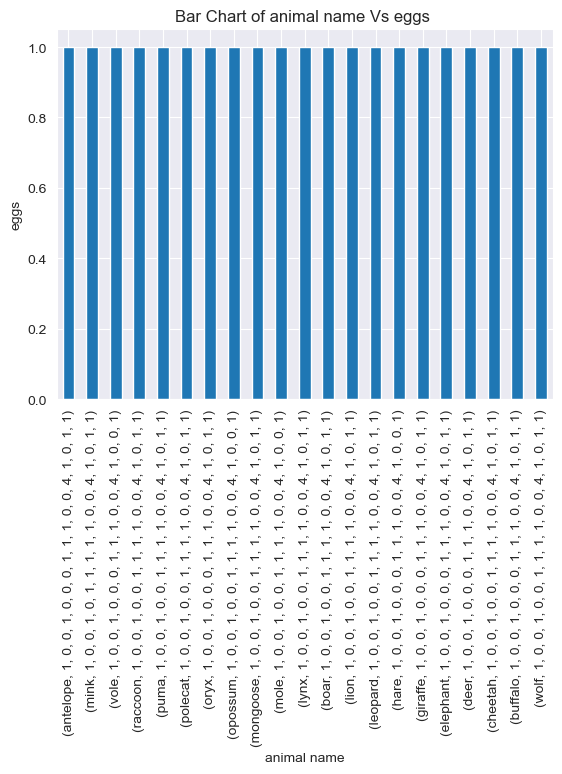

In [33]:
# Bar Chart of Data
data.value_counts().plot(kind='bar')
plt.xlabel('animal name')
plt.ylabel('eggs')
plt.title('Bar Chart of animal name Vs eggs ')
plt.show()


C:\Users\prana\AppData\Local\Temp\ipykernel_18240\3015831685.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


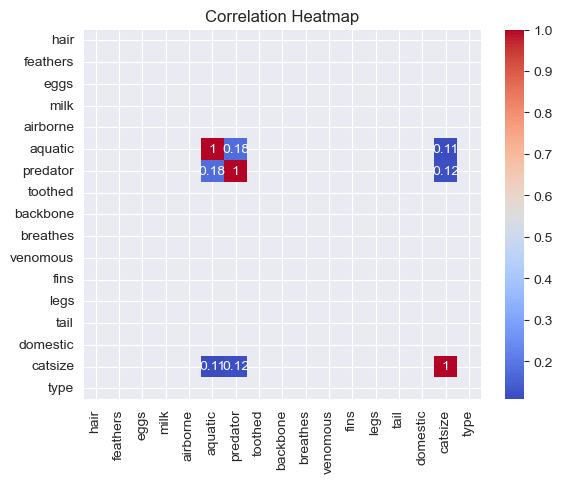

In [34]:
# Correlation Heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\prana\AppData\Local\Temp\ipykernel_18240\3037691602.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


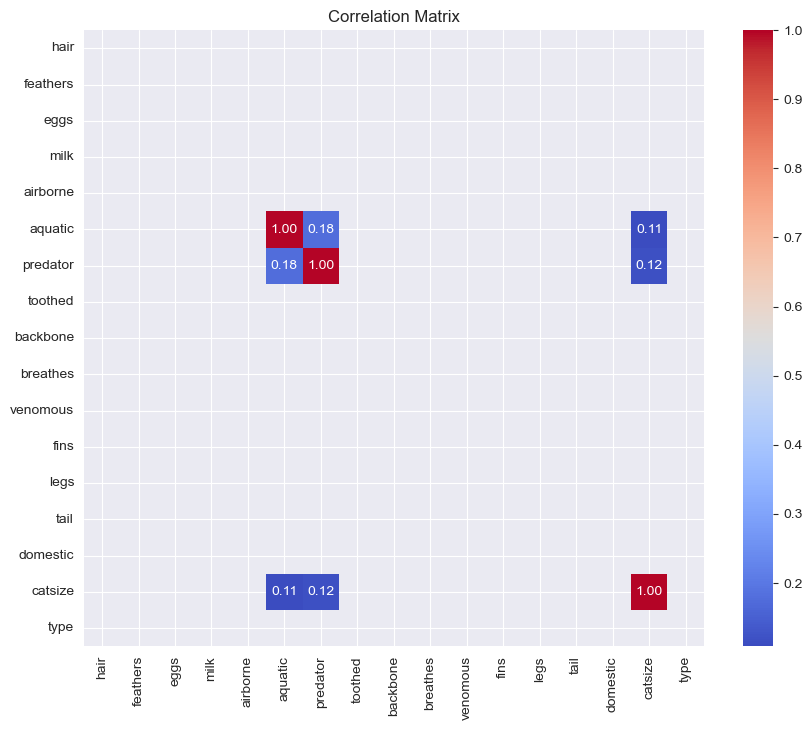

In [36]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

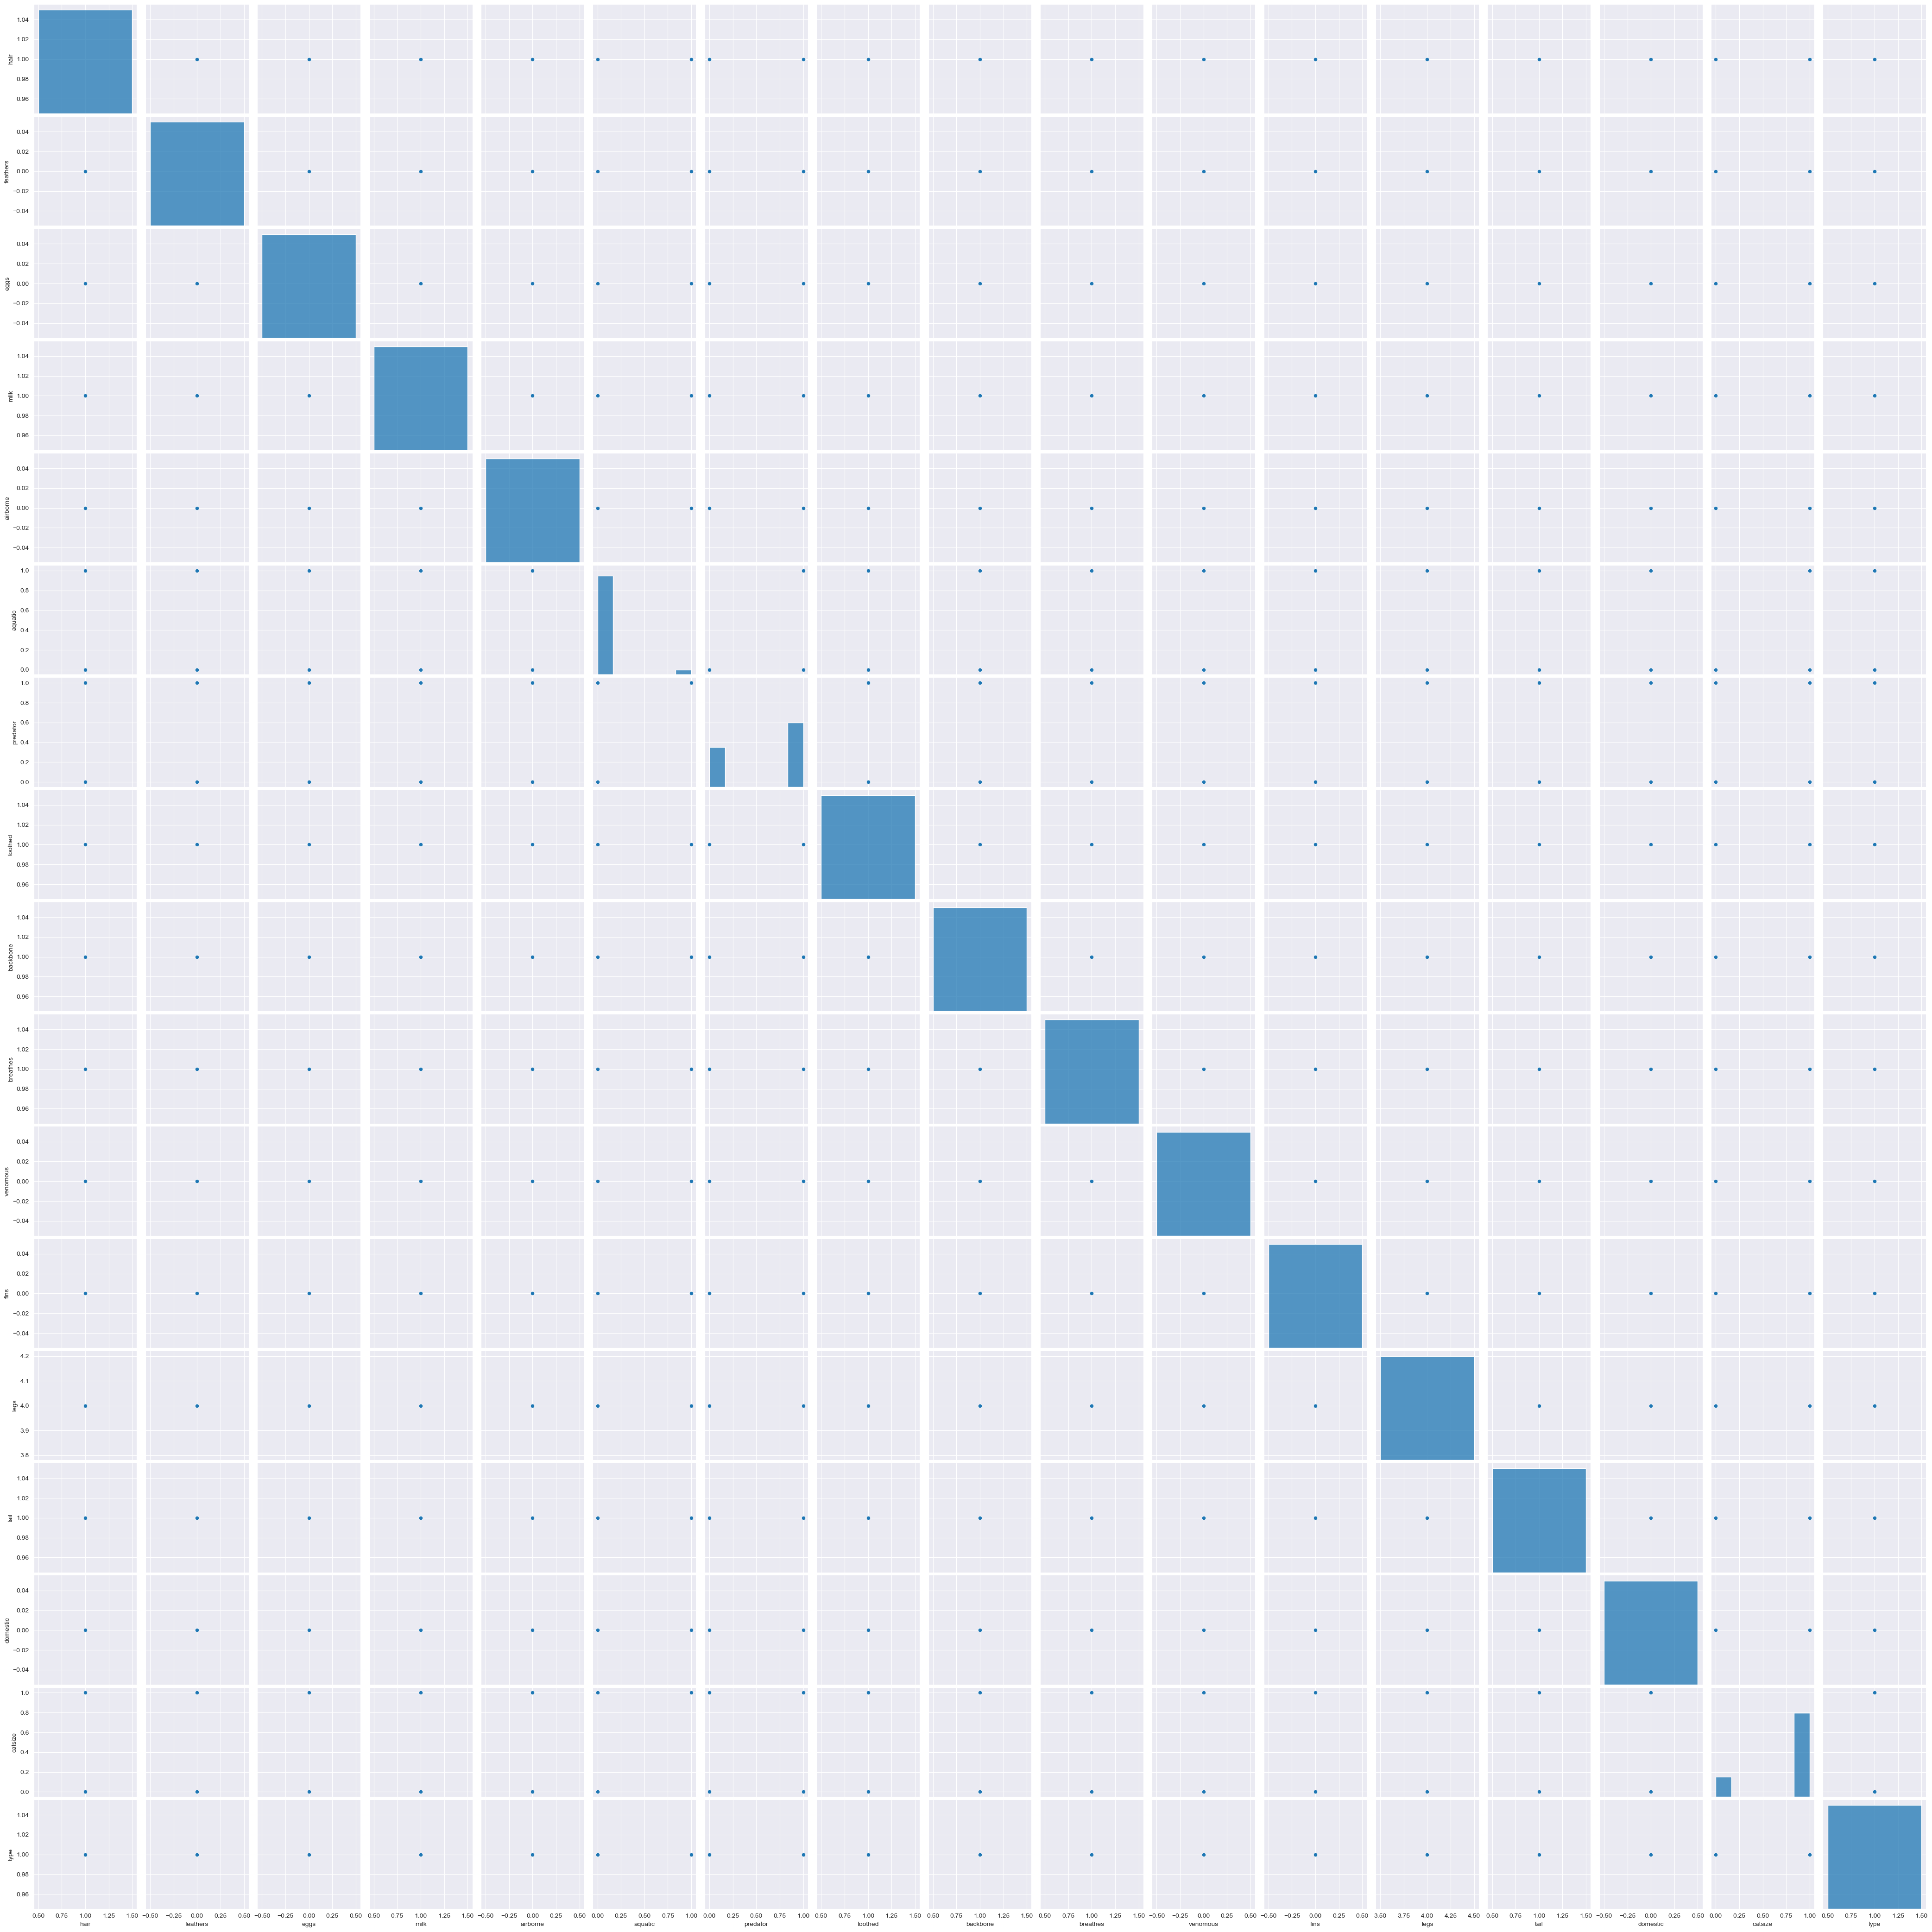

In [18]:
import seaborn as sns

#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

- Decision boundaries :

In [14]:
# Visualize the decision boundaries
# Plotting decision regions
h = 0.02  # Step size in the mesh
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


In [15]:

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary
x_min, x_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
y_min, y_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
print(X_train.shape)

(80, 16)


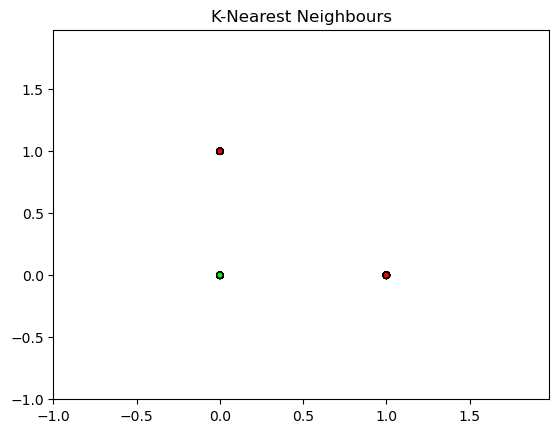

In [16]:
# Plot also the training points
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("K-Nearest Neighbours")
plt.show()
